# Theoretical symulations
\begin{equation}
H = 4E_C \left(\hat{n} - n_g \right)
\end{equation}

\begin{equation}
   \hat{H} = 4E_C(n - n_g)^2-2E_{J0}\cos(\frac{\pi\Phi}{\Phi_0})\cos \delta
\end{equation}



In [1]:
import scqubits as scq
import numpy as np

from matplotlib import pyplot as plt

In [2]:
EJ0 = 10  

EJmax = 2 *EJ0

tune_tmon = scq.TunableTransmon(
    EJmax = 50.0,
    EC = 0.1,
    d = 0, #equal jj
    ng = 0, #default doesnot matter
    flux = 0, #default
    ncut = 30 #matrix
)

## Visualise Hamiltonian

In [3]:
tune_tmon.hamiltonian()

array([[360. , -25. ,   0. , ...,   0. ,   0. ,   0. ],
       [-25. , 336.4, -25. , ...,   0. ,   0. ,   0. ],
       [  0. , -25. , 313.6, ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ..., 313.6, -25. ,   0. ],
       [  0. ,   0. ,   0. , ..., -25. , 336.4, -25. ],
       [  0. ,   0. ,   0. , ...,   0. , -25. , 360. ]])

## eigenvalues

In [4]:
tune_tmon.eigenvals()

array([-46.86292484, -40.64002032, -34.52095159, -28.50853121,
       -22.60584032, -16.81627371])

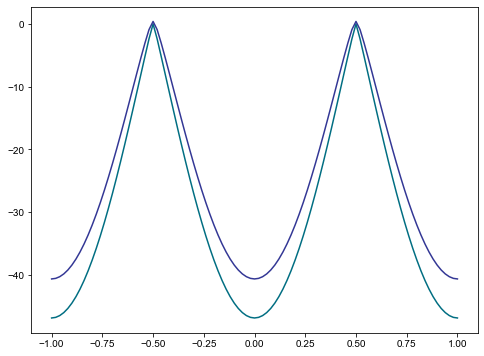

In [5]:
flux_list = np.linspace(-1,1,101)
energies = tune_tmon.get_spectrum_vs_paramvals(
    param_name="flux",
    param_vals=flux_list,
    evals_count= 2,
    subtract_ground=False
).energy_table

fix, ax = plt.subplots(1, 1, figsize=(8,6))

ax.plot(flux_list, energies[:, 0])
ax.plot(flux_list, energies[:, 1])

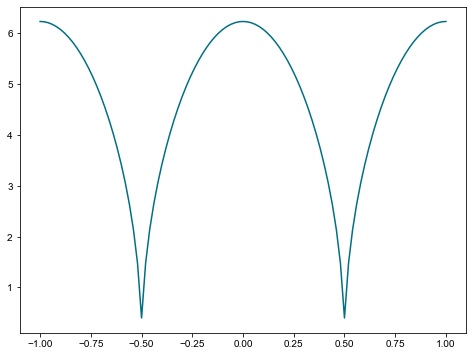

In [6]:
fix, ax = plt.subplots(1, 1, figsize=(8,6))

ax.plot(flux_list, energies[:, 1] - energies[:, 0])

# Proove that $n_g$ does not matter

<IPython.core.display.Javascript object>


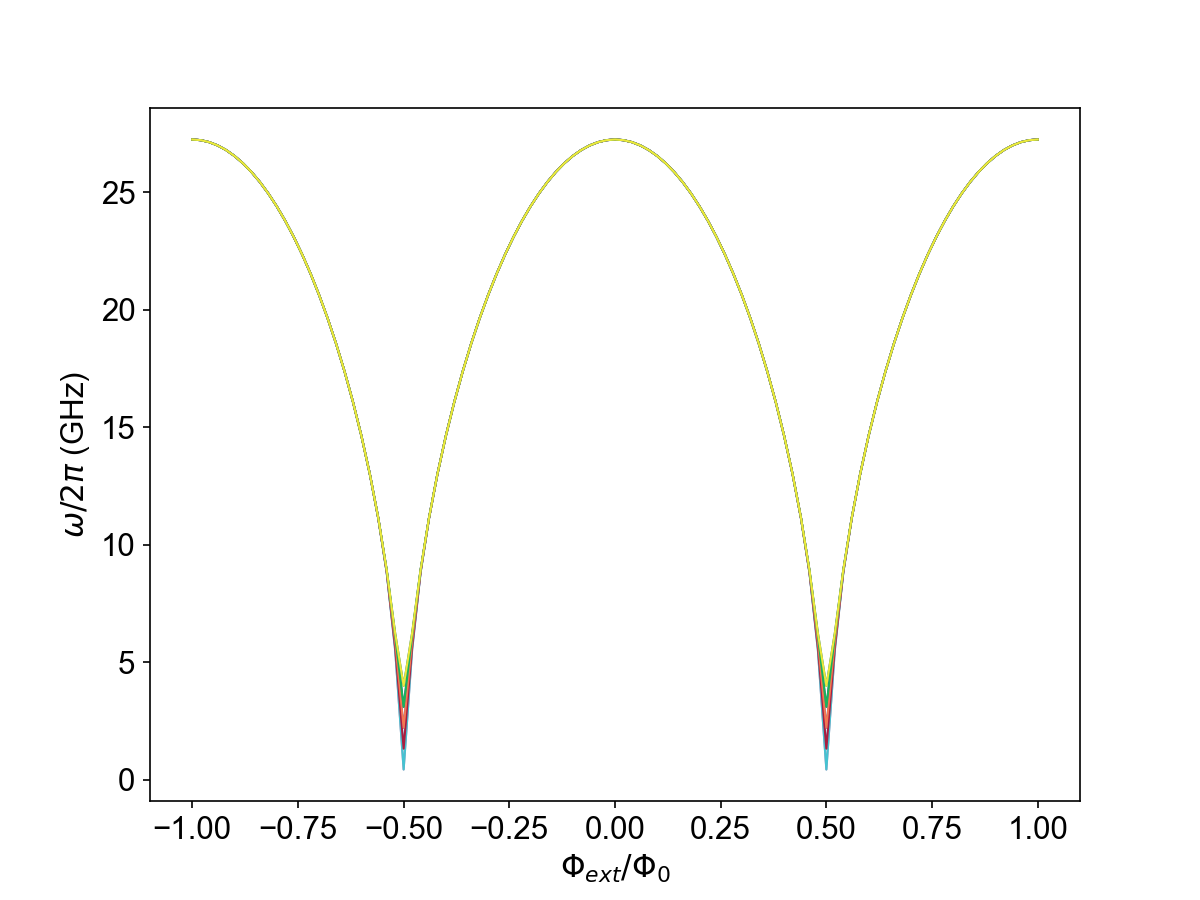

In [32]:
fix, ax = plt.subplots(1, 1, figsize=(8,6))
flux_list = np.linspace(-1,1,101)

for i in np.linspace(0, 1, 10):

    tune_tmon = scq.TunableTransmon(
        EJmax = 100.0,
        EC = 1,
        d = 0, #equal jj
        ng = i, #default doesnot matter
        flux = 0, #default
        ncut = 30 #matrix
    )
    energies = tune_tmon.get_spectrum_vs_paramvals(
        param_name="flux",
        param_vals=flux_list,
        evals_count= 2,
        subtract_ground=False
    ).energy_table


    ax.plot(flux_list,  energies[:, 1] - energies[:, 0], linewidth = 1, label=f"n_g={i}")
    

ax.set_label
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)



## Energy vs flux

<IPython.core.display.Javascript object>


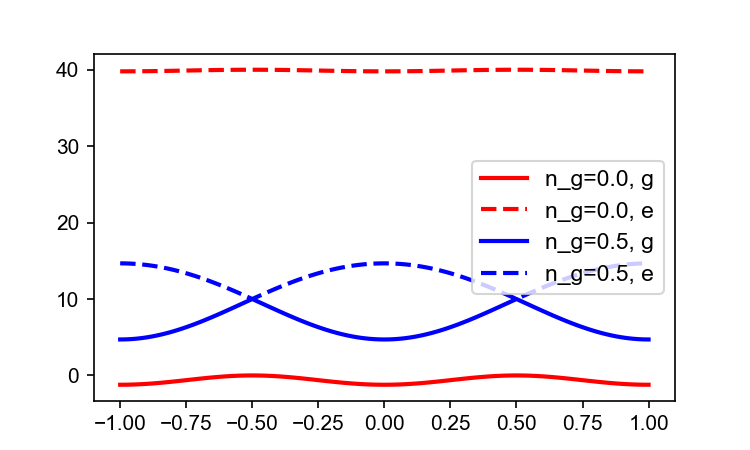

In [59]:
fix, ax = plt.subplots(1, 1, figsize=(5,3))
flux_list = np.linspace(-1,1,101)
colors = ["red", "blue"]
for idx, i in enumerate(np.linspace(0, 0.5, 2)):

    tune_tmon = scq.TunableTransmon(
        EJmax = 10,
        EC = 10,
        d = 0, #equal jj
        ng = i, #default doesnot matter
        flux = 0, #default
        ncut = 30 #matrix
    )
    energies = tune_tmon.get_spectrum_vs_paramvals(
        param_name="flux",
        param_vals=flux_list,
        evals_count= 2,
        subtract_ground=False
    ).energy_table


#     ax.plot(flux_list,  energies[:, 1] - energies[:, 0], linewidth=2, label=f"n_g={i}")
    ax.plot(flux_list,  energies[:, 0], linewidth=2, label=f"n_g={i}, g", color=colors[idx])
    ax.plot(flux_list,  energies[:, 1], linewidth=2, label=f"n_g={i}, e", color=colors[idx], linestyle="--")
    
ax.legend()

## Energy vs charge

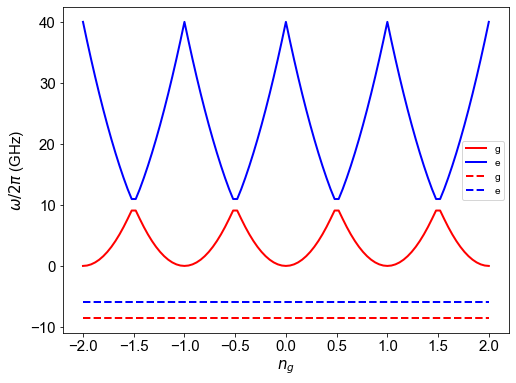

In [6]:
fix, ax = plt.subplots(1, 1, figsize=(8,6))
charge_list = np.linspace(-2,2,101)

tune_tmon = scq.TunableTransmon(
    EJmax = 1,
    EC = 10,
    d = 0, #equal jj
    ng = 0, #default doesnot matter
    flux = 0, #default
    ncut = 30 #matrix
)
energies = tune_tmon.get_spectrum_vs_paramvals(
    param_name="ng",
    param_vals=charge_list,
    evals_count= 2,
    subtract_ground=False
).energy_table


ax.plot(charge_list,  energies[:, 0], linewidth=2, label=f"g", color='red')
ax.plot(charge_list,  energies[:, 1], linewidth=2, label=f"e", color='blue')

tune_tmon = scq.TunableTransmon(
    EJmax = 10,
    EC = 0.1,
    d = 0, #equal jj
    ng = 0, #default doesnot matter
    flux = 0, #default
    ncut = 30 #matrix
)
energies = tune_tmon.get_spectrum_vs_paramvals(
    param_name="ng",
    param_vals=charge_list,
    evals_count= 2,
    subtract_ground=False
).energy_table


ax.plot(charge_list,  energies[:, 0], linewidth=2, label=f"g", color='red', linestyle = '--')
ax.plot(charge_list,  energies[:, 1], linewidth=2, label=f"e", color='blue',  linestyle = '--')
    
ax.legend()


ax.set_xlabel("$n_{g}$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

# prove amount of ncut

<IPython.core.display.Javascript object>


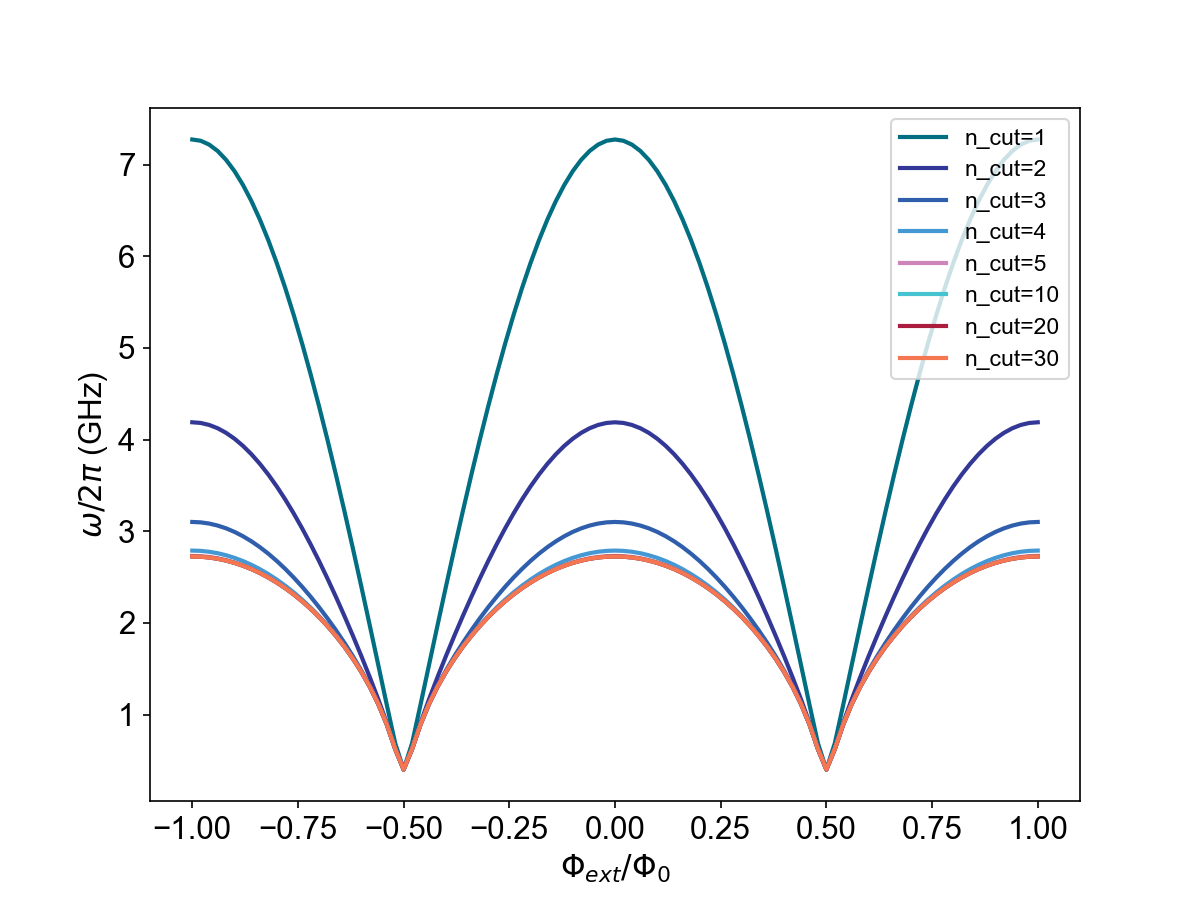

In [49]:
fix, ax = plt.subplots(1, 1, figsize=(8,6))
flux_list = np.linspace(-1,1,101)

for i in [1, 2, 3, 4, 5, 10, 20, 30]:

    tune_tmon = scq.TunableTransmon(
        EJmax = 10.0,
        EC = 0.1,
        d = 0, #equal jj
        ng = 0, #default doesnot matter
        flux = 0, #default
        ncut = i #matrix
    )
    energies = tune_tmon.get_spectrum_vs_paramvals(
        param_name="flux",
        param_vals=flux_list,
        evals_count= 3,
        subtract_ground=False
    ).energy_table


    ax.plot(flux_list,  energies[:, 1] - energies[:, 0], linewidth=2, label=f"n_cut={i}")
    
ax.legend()

ax.set_label
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend()

# load experimental results


In [10]:
1.73 * 1.38 * 10**(-23) *1.3 / eCharge * 10000

NameError: name 'eCharge' is not defined

In [48]:
phi0 = 2*10**(-15)
h = 6.64 * 10**(-34)
toGHz = 10**9
eCharge = 1.6 * 10**(-19)
kb = 1.38 * 10**(-23)
tc = 1.3

deltaold = 2 * 10**(-4) * eCharge
delta = 1.73 * kb * tc

print(deltaold)

print(delta)

R = 3 * 10**3

# EJ = (phi0 * delta / (4 * R * h))

EJ = h / (4 * eCharge**2) * delta / (2 * R * h * toGHz)
EJ

3.2000000000000003e-23
3.1036199999999993e-23


50.514648437499986

<IPython.core.display.Javascript object>


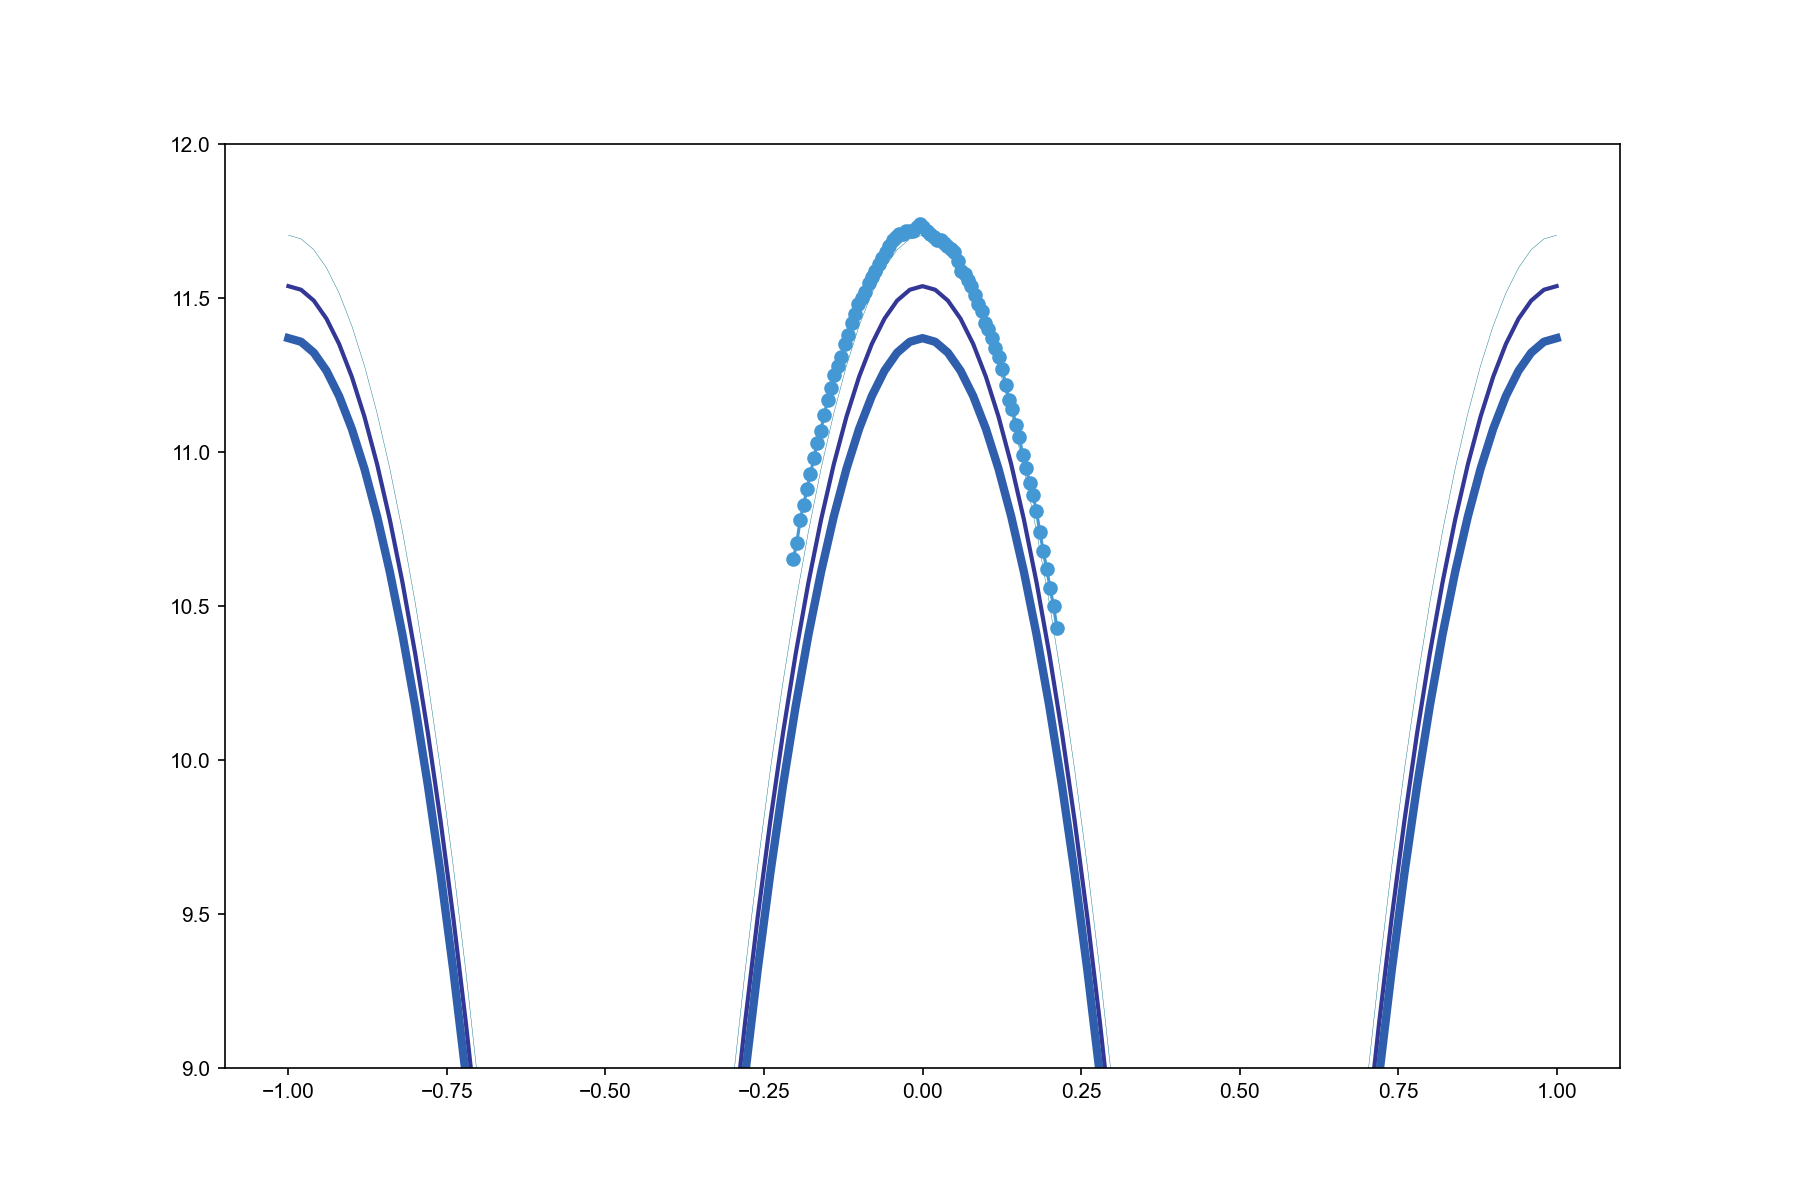

(9.0, 12.0)

In [41]:
offset = 0.58
scale = 27
data_podgon = np.loadtxt("D:/Msci_Phisics_Qubit/SIMULATIONS/podgon.txt.txt")
xpod = data_podgon[:,0] * scale - offset
ypod = data_podgon[:,1] / 10**9

EJ0 = 55
EC = 0.16

tune_tmon = scq.TunableTransmon(
    EJmax = 2*EJ0,
    EC = EC,
    d = 0, #equal jj
    ng = 0, #default doesnot matter
    flux = 0, #default
    ncut = 30 #matrix
)
energies = tune_tmon.get_spectrum_vs_paramvals(
    param_name="flux",
    param_vals=flux_list,
    evals_count= 4,
    subtract_ground=False
).energy_table

fix, ax = plt.subplots(1, 1, figsize=(12,8))

ax.plot(flux_list,  energies[:, 1] - energies[:, 0], linewidth=0.2)
ax.plot(flux_list,  energies[:, 2] - energies[:, 1], linewidth=2)
ax.plot(flux_list,  energies[:, 3] - energies[:, 2], linewidth=4)

ax.plot(xpod, ypod, marker='o')
ax.set_ylim([9,12])

In [ ]:
xpod = data_podgon[:,0]
ypod = data_podgon[:,1]

In [ ]:
xpod

In [ ]:
ypod

In [ ]:
tune_tmon.plot_n_wavefunction()

In [ ]:
tune_tmon.plot_phi_wavefunction()

In [ ]:
tune_tmon.plot_matrixelements("exp_i_phi_operator")

# Anticrossing simulation

In [ ]:
tune_tmon = scq.TunableTransmon(
        EJmax = 55.0,
        EC = 0.15,
        d = 0, #equal jj
        ng = i, #default doesnot matter
        flux = 0, #default
        ncut = 30 #matrix
)

## STEP 1: Find Qubit $\Delta$ at different magnetic fields


In [ ]:
flux_list = np.linspace(-1, 1, 101)

transition_energies = tune_tmon.get_spectrum_vs_paramvals(
    param_name="flux",
    param_vals=flux_list,
    evals_count= 2,
    subtract_ground=True
).energy_table

deltaE_list = transition_energies[:, 1]

fix, ax = plt.subplots(1, 1, figsize=(12,8))

ax.plot(flux_list, deltaE_list, marker='o')

## STEP 2: Evaluate eigenvalues of the following matrix at differnet fields
\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    \frac{\Delta E}{2} + N\hbar\omega_r & \hbar g\sqrt{N+1}\\
    \hbar g\sqrt{N+1} & -\frac{\Delta E}{2} + (N+1)\hbar\omega_r
  \end{pmatrix}
\end{equation}

USE `N = 0`

\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    \frac{\Delta E}{2} & \hbar g\\
    \hbar g & -\frac{\Delta E}{2} + \hbar\omega_r
  \end{pmatrix}
\end{equation}

THis will give the enrgy difference between states

\begin{equation}
\frac{\left|e, N\right\rangle - \left|g, N+1\right\rangle}{\sqrt{2}}  \quad \text{with energy } E_{high}
\end{equation}

and 

\begin{equation}
\frac{\left|e, N\right\rangle + \left|g, N+1\right\rangle}{\sqrt{2}}  \quad \text{with energy } E_{low}
\end{equation}

and plot $E_{high}(\Phi)$ and $E_{low}(\Phi)$

In [11]:
# 00%matplotlib notebook 
offset = 0.395
scale = 18.5

data_podgon = np.loadtxt("D:/Msci_Phisics_Qubit/SIMULATIONS/anticross.txt")
xpod = data_podgon[:,0] * scale - offset
ypod = data_podgon[:,1]


omega_r = 6.2744
g = 0.04

e_high = []
e_low = []
for dE in deltaE_list:
    a = dE
    b = g
    c = omega_r
    
    factor = np.sqrt(a**2 + 4*b**2 - 2*a*c + c**2)
    e_high.append((a+c+factor)/2)
    e_low.append((a+c-factor)/2)
    
fix, ax = plt.subplots(1, 1, figsize=(5,3))

# ax.plot(flux_list, np.array(e_high) - np.array(e_low))
ax.plot(flux_list, e_low)
ax.plot(flux_list, e_high)
ax.plot(xpod, ypod, marker='.', linewidth=0)
ax.set_ylim([6.25, 6.30])

NameError: name 'deltaE_list' is not defined